In [1]:
#2021.06.29 TUE
#Hankyeong 

#00. 패키지 호출
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

#00-1. 시각화옵션 설정하기. 
%matplotlib inline

In [2]:
#01. digits 데이터셋을 딥러닝을 통해 다중분류하기, 데이터셋 전처리 및 분할하기. 
#(1) 데이터셋 불러오기. 
digits_raw = pd.read_csv('../data/digits.csv')
digits_raw

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [3]:
#(2) 데이터셋 결측치 확인하기. 
digits_raw.isna().sum().sum()

0

In [4]:
#(3) 원본 데이터셋 복사하기. 
digits = digits_raw

#(4) feature 변수 정규화하기.  
X_scaled = StandardScaler().fit_transform(digits.iloc[:,:-1])

#(5) target 변수 원핫인코딩 처리하기. 
y_le = LabelEncoder().fit_transform(digits.iloc[:,-1])
y_le = y_le.reshape(-1,1)
Y_ohe = OneHotEncoder().fit_transform(y_le).toarray()

#(6) train, test 데이터셋으로 분할하기. 
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y_ohe, stratify=Y_ohe ,test_size=0.2, random_state=2021
)

#(7) train, test 데이터셋 차원 확인하기. 
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1437, 64), (1437, 10), (360, 64), (360, 10))

In [5]:
#02. DNN 모델 설정하기. 
#(1) 모델 정의하기. 
model = Sequential([
    Dense(units=128 ,input_dim=64, activation='relu'),
    Dense(units=512, activation='relu'),
    Dense(units=10, activation='softmax')
])

#(2) 모델의 요약정보 확인하기. 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 79,498
Trainable params: 79,498
Non-trainable params: 0
_________________________________________________________________


In [6]:
#(3) 모델의 컴파일 정보 정의하기. 
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics='accuracy'
)

#(4) 모델의 저장경로 및 checkpointer 객체 정의하기. 
model_path = '../model/digits_best_model.h5'
checkpointer = ModelCheckpoint(
    filepath=model_path,
    monitor='val_loss',
    save_best_only=True,
    verbose=0
)

#(5) earlystopping 객체 할당하기. 
earlystopping = EarlyStopping(patience=75)

#(6) 모델 학습하기. 
model_fit = model.fit(
    X_train,Y_train,
    validation_split=0.2,
    epochs=30000, 
    batch_size=250, 
    verbose=0, 
    callbacks=[checkpointer, earlystopping]
)

#(7) best 모델 할당하기. 
best_model = load_model(model_path)

#(8) 모델 예측 및 평가하기. 
accuracy_score = best_model.evaluate(X_test, Y_test)
accuracy_score

12/12 [==============================] - 0s 416us/step - loss: 0.1581 - accuracy: 0.9694


[0.1580759882926941, 0.9694444537162781]

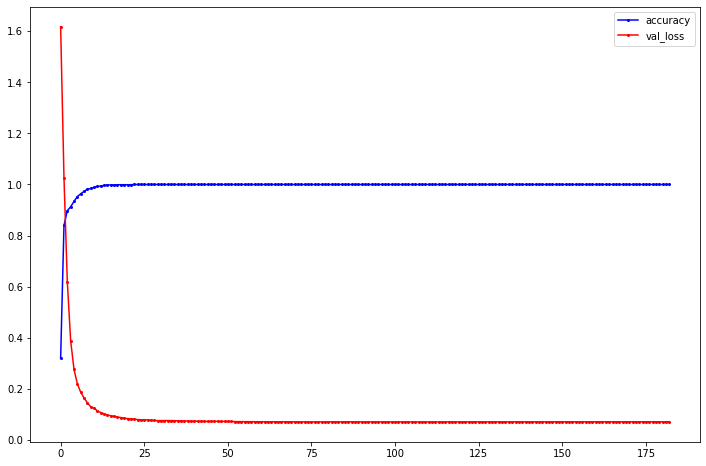

In [7]:
#(9) 훈련과정 시각화하기. 
y_acc=[]
y_vloss=[]
y_acc = model_fit.history['accuracy']
y_vloss = model_fit.history['val_loss']
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()